In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-07-18 10:10:20.995358: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 10:10:22.463773: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 10:10:22.469921: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-18 10:10:22.470778: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-18 10:10:22.486911: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMe

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12501202024709857816,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 562626560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5239805406835063632
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6"]

11
2023-07-18 10:10:22.489953: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2023-07-18 10:10:22.490146: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2023-07-18 10:10:22.490202: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2023-07-18 10:10:22.490733: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusparse.so.11
2023-07-18 10:10:22.490829: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2023-07-18 10:10:22.491733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1862] Adding visible gpu devices: 0
2023-07-18 10:10:22.491759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 10:1

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [83]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [84]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [85]:
numeric = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

print(f'numeric : {numeric}\n{"-"*84}\ncategorical : {categorical}')

numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
------------------------------------------------------------------------------------
categorical : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC'

## numeric

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

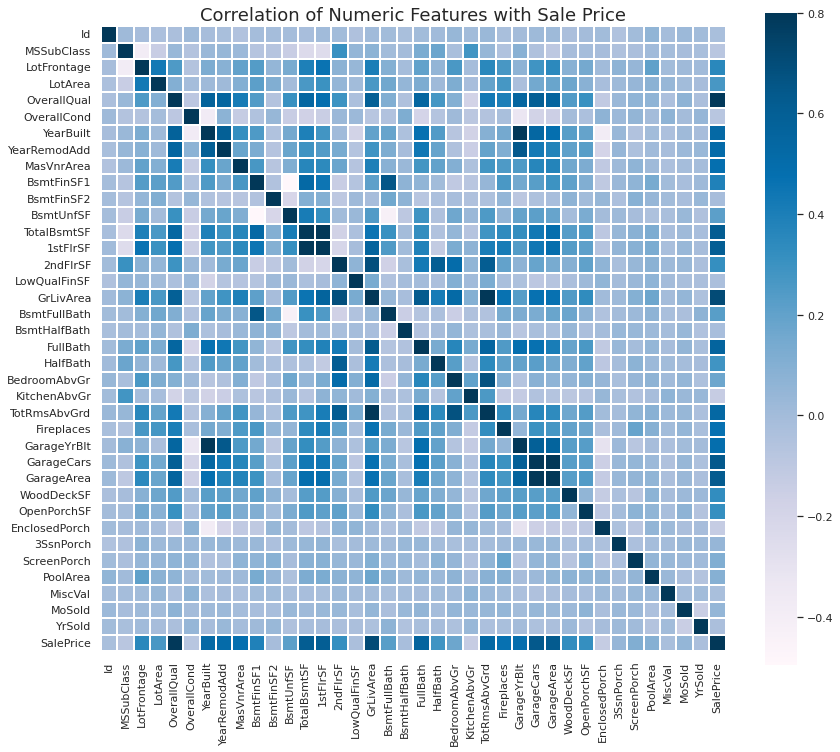

In [86]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=18)
sns.heatmap(df_train[numeric].corr(), square=True, linewidths=0.1,
            cmap=colormap, linecolor="white", vmax=0.8)

대각선 열(id와는 상관성 당연히 높음)을 제외한 박스 중 가장 진한 파란색을 띄는 박스가 보인다.

 

첫 번째는 'TotalBsmtSF'와 '1stFlrSF'변수의 관계이다.

두 번째는 'Garage'와 관련한 변수를 나타낸다.

마지막으로 'TotRmsAbvGrd'와 'GrLivArea'의 관계이다.

 

두 경우 모두 변수 사이의 상관 관계가 너무 강하여 다중 공선성(MultiColarisity) 상황이 나타날 수 있습니다.

변수가 거의 동일한 정보를 제공하므로 다중 공선성이 실제로 발생한다는 결론을 내릴 수 있습니다.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

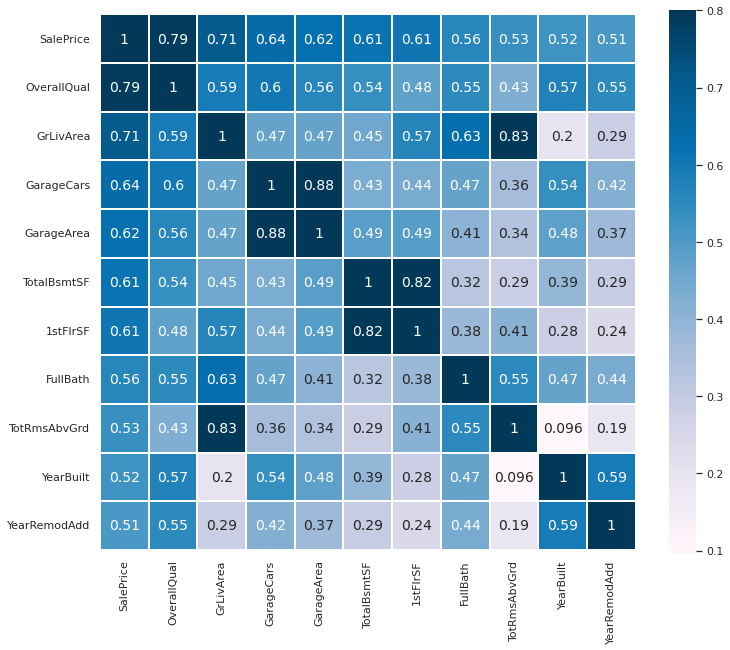

In [87]:
k = 11
cols = df_train[numeric].corr().nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, vmax=.8, linewidths=0.1, square=True, annot=True, cmap=colormap,
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 14}, yticklabels=cols.values)

GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF, TotRmsAbvGrd와 GrLivArea는 모두 매우 유사한 정보를 포함하고 있으며 다중공선성이 나타난다고 할 수 있다.  

SalePrice와 더 연관되어있는 변수인 GarageCars와 TotalBsmtSF, GrLivArea를 남기고 나머지는 이후에 버리도록 하자.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

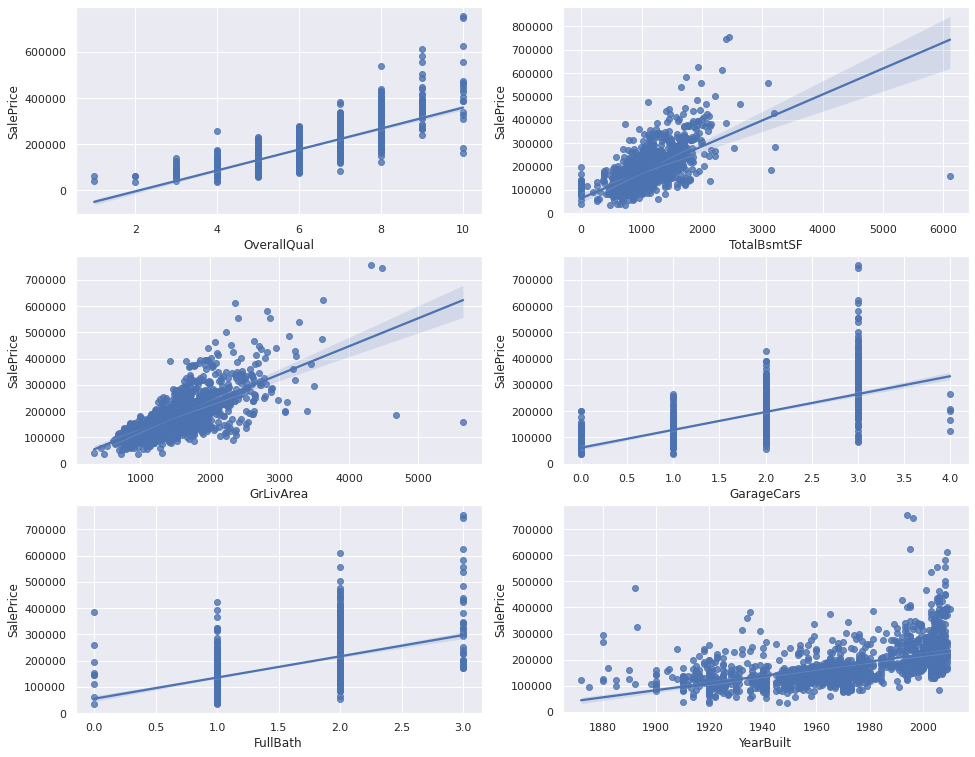

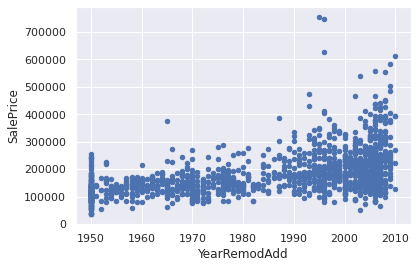

In [88]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16, 13))
OverallQual_scatter_plot = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.regplot(x='OverallQual', y='SalePrice', data=OverallQual_scatter_plot, scatter=True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=TotalBsmtSF_scatter_plot, scatter=True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
sns.regplot(x='GrLivArea', y='SalePrice', data=GrLivArea_scatter_plot, scatter=True, fit_reg=True, ax=ax3)
GarageCars_scatter_plot = pd.concat([df_train['SalePrice'], df_train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars', y='SalePrice', data=GarageCars_scatter_plot, scatter=True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([df_train['SalePrice'], df_train['FullBath']],axis = 1)
sns.regplot(x='FullBath', y='SalePrice', data=FullBath_scatter_plot, scatter=True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([df_train['SalePrice'], df_train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt', y='SalePrice', data=YearBuilt_scatter_plot, scatter=True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([df_train['SalePrice'], df_train['YearRemodAdd']], axis=1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd', 'SalePrice')

Target Feature "SalePrice"와 가장 밀접한 연관이 있다고 판단됐던 변수들의 Scatter Plot을 그려봄

## categorical

In [89]:
for catg in list(categorical):
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

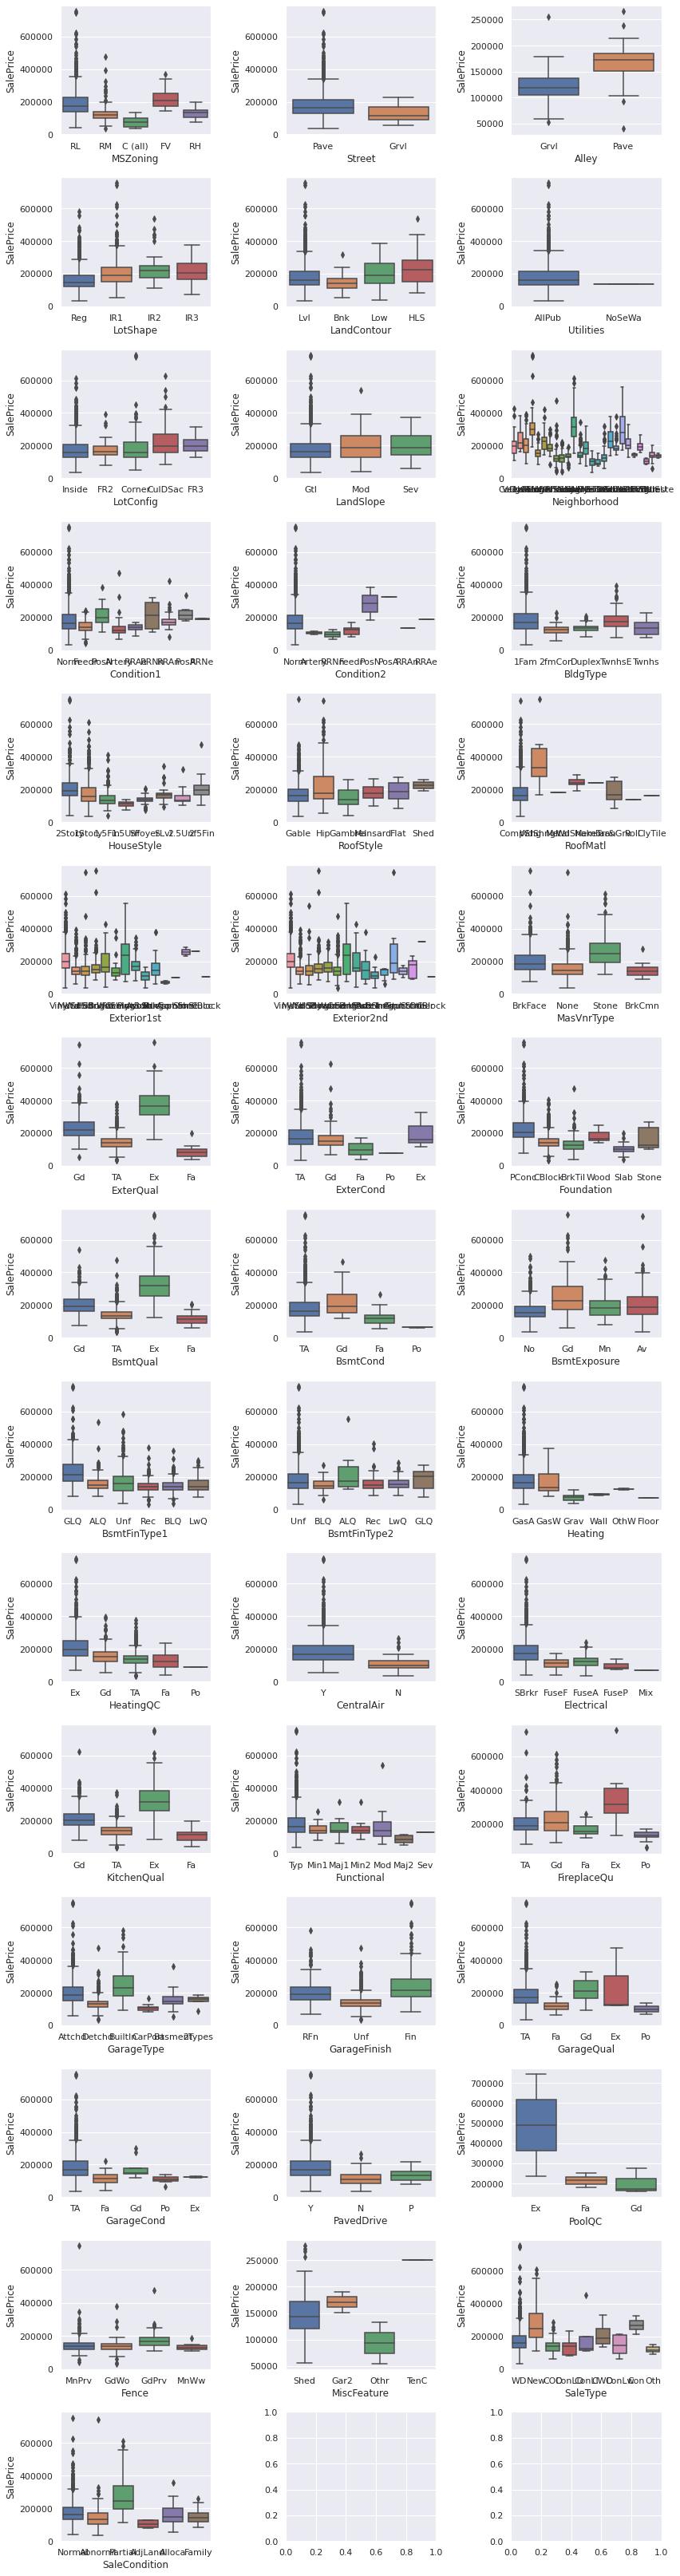

In [90]:
li_cat_feats = list(categorical)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax=axs[r][c])

plt.tight_layout()
plt.show()

In [91]:
num_strong_corr = ['SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
                   'FullBath', 'YearBuilt', 'YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition']

# Drop weak corr features

In [92]:
id_test = df_test['Id']

to_drop_num = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace=True, axis=1)

In [93]:
df_train

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType,SalePrice
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,Gd,Gd,856,Y,SBrkr,1710,2,Gd,2,WD,208500
1,RL,Veenker,Norm,6,1976,1976,None,TA,Gd,1262,Y,SBrkr,1262,2,TA,2,WD,181500
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,Gd,Gd,920,Y,SBrkr,1786,2,Gd,2,WD,223500
3,RL,Crawfor,Norm,7,1915,1970,None,TA,TA,756,Y,SBrkr,1717,1,Gd,3,WD,140000
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,2198,2,Gd,3,WD,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,Norm,6,1999,2000,None,TA,Gd,953,Y,SBrkr,1647,2,TA,2,WD,175000
1456,RL,NWAmes,Norm,6,1978,1988,Stone,TA,Gd,1542,Y,SBrkr,2073,2,TA,2,WD,210000
1457,RL,Crawfor,Norm,7,1941,2006,None,Ex,TA,1152,Y,SBrkr,2340,2,Gd,1,WD,266500
1458,RL,NAmes,Norm,5,1950,1996,None,TA,TA,1078,Y,FuseA,1078,1,Gd,1,WD,142125


# Missing data in strong corr features

In [102]:
df_train_missing = df_train.isnull().sum()
df_test_missing = df_test.isnull().sum()

combined_missing = pd.concat([df_train_missing[df_train_missing > 0], df_test_missing[df_test_missing > 0]])
unique_missing_features = combined_missing.index.unique()
unique_missing_features

Index(['MasVnrType', 'BsmtQual', 'Electrical', 'MSZoning', 'TotalBsmtSF',
       'KitchenQual', 'GarageCars', 'SaleType'],
      dtype='object')

In [103]:
len(unique_missing_features)

8

In [65]:
df_train.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [104]:
for col in unique_missing_features:
    print(col)
    df_train[col].fillna('None', inplace=True)
    df_test[col].fillna('None', inplace=True)

MasVnrType
BsmtQual
Electrical
MSZoning
TotalBsmtSF
KitchenQual
GarageCars
SaleType


In [105]:
# missing data가 있는지 재확인
df_train.isnull().sum().max(), df_test.isnull().sum().max()

(0, 0)

In [107]:
# test set에 결측치 남았는지 확인
missing_values = df_test[df_test.isnull().any(axis=1)]
missing_values

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType


In [108]:
numeric = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [109]:
print(f'numeric : {numeric}\n{"-"*84}\ncategorical : {categorical}')

numeric : ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']
------------------------------------------------------------------------------------
categorical : ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [110]:
# 문자열 데이터를 제외하고 숫자형 데이터만 선택
# df_numeric = df_train[numeric]
# df_numeric = df_numeric.drop('Id', axis=1)
# corrmat = df_numeric.corr()  # dataFrame 통째로 corr function 사용 (Id와 text인 것은 제외하고)

# corrmat

# numeric_columns = numeric + ['SalePrice']
df_numeric = df_train[numeric]
corrmat = df_numeric.corr()  # dataFrame 통째로 corr function 사용 (Id와 text인 것은 제외하고)

corrmat

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.593007,0.550600,0.600671,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.199010,0.468271,0.537850,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.287389,0.439046,0.420622,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.454868,0.323722,0.434585,0.613581
GrLivArea,0.593007,0.199010,0.287389,0.454868,1.000000,0.630012,0.467247,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.630012,1.000000,0.469672,0.560664
GarageCars,0.600671,0.537850,0.420622,0.434585,0.467247,0.469672,1.000000,0.640409
SalePrice,0.790982,0.522897,0.507101,0.613581,0.708624,0.560664,0.640409,1.000000


<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

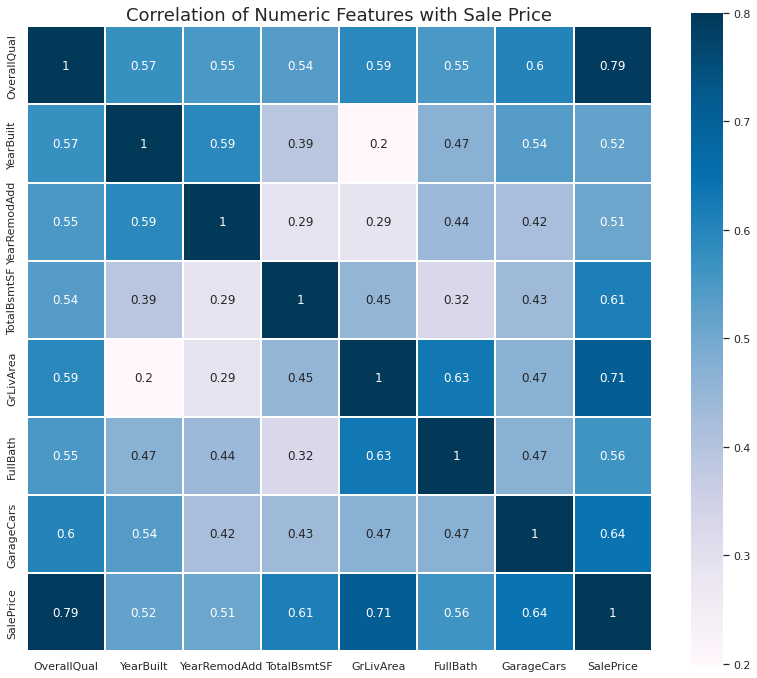

In [118]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=18)
sns.heatmap(corrmat, square=True, linewidths=0.1, annot=True,
            cmap=colormap, linecolor="white", vmax=0.8)

In [119]:
corrmat.sort_values(by=['SalePrice'])['SalePrice']  # SalePrice에 대한 상관관계를 정렬

YearRemodAdd    0.507101
YearBuilt       0.522897
FullBath        0.560664
TotalBsmtSF     0.613581
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

# Preprocess categorical data

<br>

텍스트를 점수형으로 바꿔보기

In [120]:
df_train.ExterQual  # 점수인데 텍스트로 저장되어있는 상황

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [121]:
df_train.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

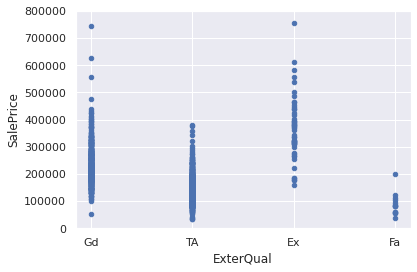

In [122]:
data = pd.concat([df_train['SalePrice'], df_train['ExterQual']], axis=1)
data.plot.scatter(x='ExterQual', y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

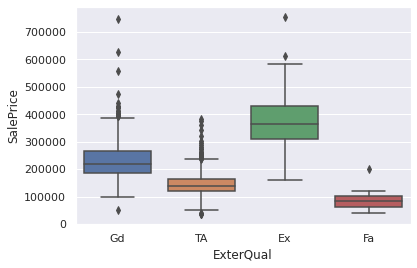

In [123]:
sns.boxplot(x='ExterQual', y='SalePrice', data=data)

In [131]:
df_order = pd.DataFrame()

In [135]:
df_order['val'] = df_train.ExterQual.unique()
df_order

,val
0,Gd
1,TA
2,Ex
3,Fa


In [20]:
df_order['val'] = df_train.ExterQual.unique()
df_order

,val
0,Gd
1,TA
2,Ex
3,Fa


In [136]:
df_order.index = df_order.val  # 값 자체를 index로 사용하기 위해 치환해줌
df_order

,val
val,
Gd,Gd
TA,TA
Ex,Ex
Fa,Fa


In [22]:
df_train[['ExterQual', 'SalePrice']]

,ExterQual,SalePrice
0,Gd,208500
1,TA,181500
2,Gd,223500
3,TA,140000
4,Gd,250000
...,...,...
1455,TA,175000
1456,TA,210000
1457,Ex,266500
1458,TA,142125


In [137]:
df_order['mean_price'] = df_train[['ExterQual', 'SalePrice']].groupby('ExterQual').mean()['SalePrice']
df_order

,val,mean_price
val,,
Gd,Gd,231633.510246
TA,TA,144341.313466
Ex,Ex,367360.961538
Fa,Fa,87985.214286


In [138]:
df_order = df_order.sort_values(by='mean_price', ascending=False)
df_order

,val,mean_price
val,,
Ex,Ex,367360.961538
Gd,Gd,231633.510246
TA,TA,144341.313466
Fa,Fa,87985.214286


In [139]:
df_order['rank'] = range(1, len(df_order) + 1)
df_order

,val,mean_price,rank
val,,,
Ex,Ex,367360.961538,1
Gd,Gd,231633.510246,2
TA,TA,144341.313466,3
Fa,Fa,87985.214286,4


In [140]:
df_order['rank']

val
Ex    1
Gd    2
TA    3
Fa    4
Name: rank, dtype: int64

In [141]:
df_order = df_order['rank'].to_dict()  # 이 dictionary를 구하기 위해 지금까지의 작업이 진행됐었다
df_order

{'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4}

In [142]:
# feature를 추가함(apply 활용)
df_train['ExterQual_rank'] = df_train.apply(lambda x: df_order[x['ExterQual']], axis=1)

In [143]:
df_train[['ExterQual', 'ExterQual_rank']]

,ExterQual,ExterQual_rank
0,Gd,2
1,TA,3
2,Gd,2
3,TA,3
4,Gd,2
...,...,...
1455,TA,3
1456,TA,3
1457,Ex,1
1458,TA,3


In [145]:
# 함수화
def add_rank_feature(feature_name, rank_feature_name):
    df_order = pd.DataFrame()
    df_order['val'] = df_train[feature_name].unique()
    df_order.index = df_order.val  # 값 자체를 index로 사용하기 위해 치환

    df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
    df_order['rank'] = range(1, len(df_order) + 1)
    df_order = df_order['rank'].to_dict()

    df_train[rank_feature_name] = df_train.apply(lambda x: df_order[x[feature_name]], axis=1)

In [146]:
categorical

['MSZoning',
 'Neighborhood',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [147]:
# 범주형 -> 수치형 일괄 작업

rank_features = []
for feature_name in categorical:
    rank_feature_name = feature_name + '_rank'
    print(feature_name, '-->', rank_feature_name)

    add_rank_feature(feature_name, rank_feature_name)

    rank_features.append(rank_feature_name)

MSZoning --> MSZoning_rank
Neighborhood --> Neighborhood_rank
Condition2 --> Condition2_rank
MasVnrType --> MasVnrType_rank
ExterQual --> ExterQual_rank
BsmtQual --> BsmtQual_rank
CentralAir --> CentralAir_rank
Electrical --> Electrical_rank
KitchenQual --> KitchenQual_rank
SaleType --> SaleType_rank


In [148]:
rank_cols = df_train.filter(regex='rank').columns
df_train[rank_cols]

,ExterQual_rank,MSZoning_rank,Neighborhood_rank,Condition2_rank,MasVnrType_rank,BsmtQual_rank,CentralAir_rank,Electrical_rank,KitchenQual_rank,SaleType_rank
0,1,1,1,1,1,1,1,1,1,1
1,2,1,2,1,2,1,1,1,2,1
2,1,1,1,1,1,1,1,1,1,1
3,2,1,3,1,2,2,1,1,1,1
4,1,1,4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1455,2,1,18,1,2,1,1,1,2,1
1456,2,1,7,1,3,1,1,1,2,1
1457,3,1,3,1,2,2,1,1,1,1
1458,2,1,12,1,2,2,1,3,1,1


In [149]:
len(categorical)

10

# **전처리가 된 feature 모아보기**

In [150]:
df_processed = df_train[rank_features + numeric]
df_processed

,MSZoning_rank,Neighborhood_rank,Condition2_rank,MasVnrType_rank,ExterQual_rank,BsmtQual_rank,CentralAir_rank,Electrical_rank,KitchenQual_rank,SaleType_rank,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,1,1,1,1,1,1,1,1,1,1,7,2003,2003,856,1710,2,2,208500
1,1,2,1,2,2,1,1,1,2,1,6,1976,1976,1262,1262,2,2,181500
2,1,1,1,1,1,1,1,1,1,1,7,2001,2002,920,1786,2,2,223500
3,1,3,1,2,2,2,1,1,1,1,7,1915,1970,756,1717,1,3,140000
4,1,4,1,1,1,1,1,1,1,1,8,2000,2000,1145,2198,2,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,18,1,2,2,1,1,1,2,1,6,1999,2000,953,1647,2,2,175000
1456,1,7,1,3,2,1,1,1,2,1,6,1978,1988,1542,2073,2,2,210000
1457,1,3,1,2,3,2,1,1,1,1,7,1941,2006,1152,2340,2,1,266500
1458,1,12,1,2,2,2,1,3,1,1,5,1950,1996,1078,1078,1,1,142125


In [151]:
corrmat = df_processed.corr()

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

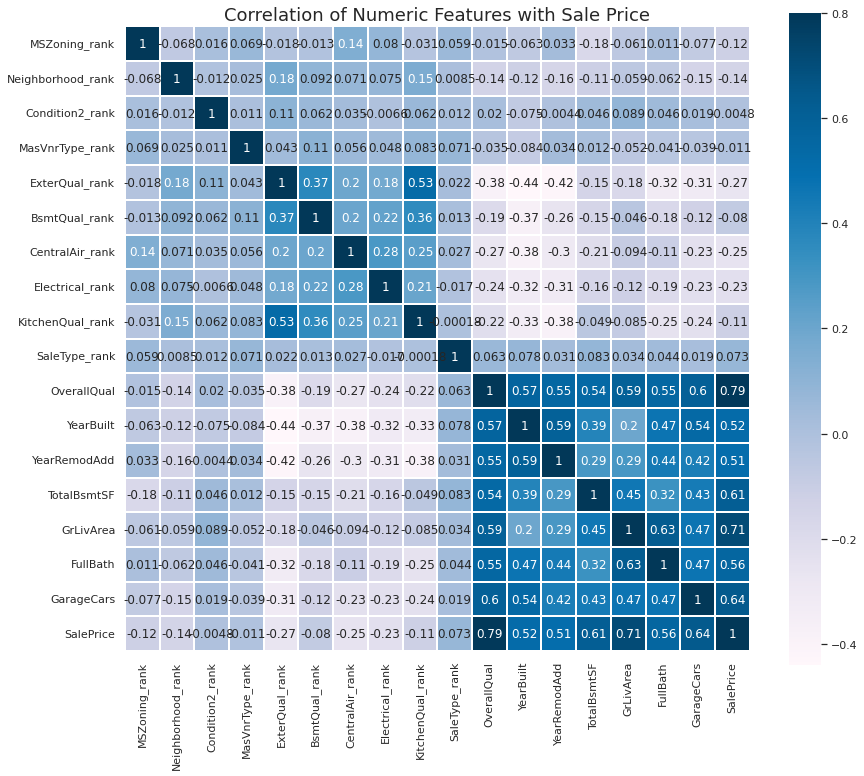

In [152]:
colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=18)
sns.heatmap(corrmat, square=True, linewidths=0.1, annot=True,
            cmap=colormap, linecolor="white", vmax=0.8)

In [153]:
corrmat.sort_values(by=['SalePrice'])['SalePrice']

ExterQual_rank      -0.265015
CentralAir_rank     -0.251328
Electrical_rank     -0.226145
Neighborhood_rank   -0.143621
MSZoning_rank       -0.116047
KitchenQual_rank    -0.114746
BsmtQual_rank       -0.080199
MasVnrType_rank     -0.010695
Condition2_rank     -0.004833
SaleType_rank        0.072896
YearRemodAdd         0.507101
YearBuilt            0.522897
FullBath             0.560664
TotalBsmtSF          0.613581
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [154]:
df_features = corrmat.sort_values(by=['SalePrice'])['SalePrice']

In [155]:
len(df_features)

18

In [156]:
df_features.index.tolist()[:-1]

['ExterQual_rank',
 'CentralAir_rank',
 'Electrical_rank',
 'Neighborhood_rank',
 'MSZoning_rank',
 'KitchenQual_rank',
 'BsmtQual_rank',
 'MasVnrType_rank',
 'Condition2_rank',
 'SaleType_rank',
 'YearRemodAdd',
 'YearBuilt',
 'FullBath',
 'TotalBsmtSF',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

# X, y data

In [157]:
# X = df_processed.iloc[:, :-1]
X = df_processed[df_features.index.tolist()[:-1]]
y = df_processed['SalePrice']

In [158]:
X.shape, y.shape

((1460, 17), (1460,))

In [160]:
X

,ExterQual_rank,CentralAir_rank,Electrical_rank,Neighborhood_rank,MSZoning_rank,KitchenQual_rank,BsmtQual_rank,MasVnrType_rank,Condition2_rank,SaleType_rank,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual
0,1,1,1,1,1,1,1,1,1,1,2003,2003,2,856,2,1710,7
1,2,1,1,2,1,2,1,2,1,1,1976,1976,2,1262,2,1262,6
2,1,1,1,1,1,1,1,1,1,1,2002,2001,2,920,2,1786,7
3,2,1,1,3,1,1,2,2,1,1,1970,1915,1,756,3,1717,7
4,1,1,1,4,1,1,1,1,1,1,2000,2000,2,1145,3,2198,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,1,1,18,1,2,1,2,1,1,2000,1999,2,953,2,1647,6
1456,2,1,1,7,1,2,1,3,1,1,1988,1978,2,1542,2,2073,6
1457,3,1,1,3,1,1,2,2,1,1,2006,1941,2,1152,1,2340,7
1458,2,1,3,12,1,1,2,2,1,1,1996,1950,1,1078,1,1078,5


In [161]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [162]:
y.shape

(1460,)

In [163]:
y = np.array(y).reshape(-1, 1)
y.shape

(1460, 1)

In [164]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

# Data preprocessing

In [165]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 값 scaling(MinMaxScaler)

In [166]:
x_min_max_scaler = MinMaxScaler()
x_min_max_scaler.fit(X)
scaled_X = x_min_max_scaler.transform(X)

y_min_max_scaler = MinMaxScaler()
y_min_max_scaler.fit(y)
scaled_y = y_min_max_scaler.transform(y)

# KFold Cross Validation

In [167]:
# K-fold cross validation
K = 10
kf = KFold(n_splits=K)

# Final

## Linear regression (Lasso)

In [168]:
from sklearn.linear_model import Lasso

In [169]:
rmses_lasso = []
for train_index, test_index in kf.split(scaled_X):
    #rint("TEST:", test_index, "TRAIN:", train_index)

    scaled_X_train, scaled_X_test = scaled_X[train_index], scaled_X[test_index]
    scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
    y_test = y[test_index]

    # training
    model_lasso = Lasso() # y = Xw
    model_lasso = model_lasso.fit(scaled_X_train, scaled_y_train)

    # evaluation
    pred = model_lasso.predict(scaled_X_test).reshape((-1, 1)) # y: 0 ~ 1
    pred = y_min_max_scaler.inverse_transform(pred) # 원상복구된 스케일

    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(rmse)
    print("---------------------")

    rmses_lasso.append(rmse)
print("average rmse:", np.mean(rmses_lasso))

68479.61848137801
---------------------
80011.92820033105
---------------------
79275.65958882873
---------------------
82868.15912800275
---------------------
96386.20490927555
---------------------
76808.56629102639
---------------------
72198.44861652121
---------------------
71213.04254017191
---------------------
90347.61467595294
---------------------
72613.27897372228
---------------------
average rmse: 79020.25214052107


## MLP (Multi-layer Perceptron)

In [170]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [171]:
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

2023-07-18 11:35:38.406745: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-18 11:35:38.409451: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-18 11:35:38.409525: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 11:35:38.409579: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-07-18 11:35:38.409607: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-07-18 11:35:38.409635: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.s

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [172]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [173]:
rmses_mlp = []
for train_index, test_index in kf.split(scaled_X):
    scaled_X_train, scaled_X_test = scaled_X[train_index], scaled_X[test_index]
    scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
    y_test = y[test_index]

    # training
    model_mlp = keras.Sequential(
      [
          keras.Input(shape=scaled_X_train.shape[-1]),
          layers.Dense(96, activation='relu'),
          layers.Dense(48, activation='relu'),
          layers.Dense(1)
      ]
    )

    model_mlp.compile(loss="mse", optimizer="adam")

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
    model_mlp.fit(scaled_X_train, scaled_y_train,
            batch_size=4, epochs=150,
            callbacks=[early_stopping_callback], validation_split=0.05)

    # evaluation
    pred = model_mlp.predict(scaled_X_test).reshape((-1, 1))
    pred = y_min_max_scaler.inverse_transform(pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(rmse)
    print("---------------------")

    rmses_mlp.append(rmse)

print("average rmse:", np.mean(rmses_mlp))

2023-07-18 11:35:40.788038: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-18 11:35:40.789479: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-18 11:35:40.789522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 11:35:40.789559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-07-18 11:35:40.789573: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-07-18 11:35:40.789586: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.s

Epoch 1/150


2023-07-18 11:35:41.188338: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


115/312 [==========>...................] - ETA: 0s - loss: 0.0135    

2023-07-18 11:35:41.814834: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-07-18 11:35:41.816625: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


312/312 [==============================] - 1s 2ms/step - loss: 0.0092 - val_loss: 0.0026
Epoch 2/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 3/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 4/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 5/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 6/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 7/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 8/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 9/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/150
312/312 [==============================] - 1s 2ms/step - loss: 0.0016 - val_loss: 0.0013
E

## Random Forest

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
rmses_rf = []

for train_index, test_index in kf.split(scaled_X):
    # print("TEST:", test_index, "TRAIN:", train_index)

    scaled_X_train, scaled_X_test = scaled_X[train_index], scaled_X[test_index]
    scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
    y_test = y[test_index]

    # training
    model_rf = RandomForestRegressor(random_state=0, n_estimators=100) # 단순화된 weak learner를 100개 만들겠다.
    model_rf = model_rf.fit(scaled_X_train, scaled_y_train)

    # evaluation
    pred = model_rf.predict(scaled_X_test).reshape((-1, 1))
    pred = y_min_max_scaler.inverse_transform(pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(rmse)
    print("---------------------")

    rmses_rf.append(rmse)

print("average rmse:", np.mean(rmses_rf))

/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


28070.312091396372
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


28497.10858918662
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


26087.212224151128
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


45664.79859224597
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


34906.65587724144
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


24918.419393791846
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


23548.44169397208
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


20830.90367124235
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


37968.70832968026
---------------------


/tmp/ipykernel_294162/1226433901.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = model_rf.fit(scaled_X_train, scaled_y_train)


30610.231546519193
---------------------
average rmse: 30110.27920094273


## AdaBoost

In [176]:
from sklearn.ensemble import AdaBoostRegressor

In [177]:
rmses_ada = []

for train_index, test_index in kf.split(scaled_X):
    # print("TEST:", test_index, "TRAIN:", train_index)

    scaled_X_train, scaled_X_test = scaled_X[train_index], scaled_X[test_index]
    scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
    y_test = y[test_index]

    # training
    model_ada = AdaBoostRegressor(random_state=0)
    model_ada = model_ada.fit(scaled_X_train, scaled_y_train)

    # evaluation
    pred = model_ada.predict(scaled_X_test).reshape((-1, 1))
    pred = y_min_max_scaler.inverse_transform(pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(rmse)
    print("---------------------")

    rmses_ada.append(rmse)

print("average rmse:", np.mean(rmses_ada))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


31835.315171403276
---------------------
33164.11308016736
---------------------
31966.761858393416
---------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


48937.66372150278
---------------------
39066.2270502611
---------------------
33712.67808253784
---------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


34641.91942633778
---------------------
31030.510000903127
---------------------
42691.40849544917
---------------------
36004.448101238646
---------------------
average rmse: 36305.10449881945


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## XGBoost

In [178]:
from xgboost import XGBRegressor

In [182]:
rmses_xgb = []

for train_index, test_index in kf.split(scaled_X):
    # print("TEST:", test_index, "TRAIN:", train_index)

    scaled_X_train, scaled_X_test = scaled_X[train_index], scaled_X[test_index]
    scaled_y_train, scaled_y_test = scaled_y[train_index], scaled_y[test_index]
    y_test = y[test_index]

    # training
    model_xgb = XGBRegressor(n_estimators=300)
    model_xgb = model_xgb.fit(scaled_X_train, scaled_y_train)

    # evaluation
    pred = model_xgb.predict(scaled_X_test).reshape((-1, 1))
    pred = y_min_max_scaler.inverse_transform(pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(rmse)
    print("---------------------")

    rmses_xgb.append(rmse)

print("average rmse:", np.mean(rmses_xgb))

27672.012919505833
---------------------
30058.080414686476
---------------------
28308.44847320753
---------------------
42042.791603542195
---------------------
33218.58973009546
---------------------
25862.054755520145
---------------------
24829.130176384086
---------------------
22761.16747992385
---------------------
34034.757699760085
---------------------
32879.41603833209
---------------------
average rmse: 30166.644929095775


# Submission

In [180]:
df_test

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType
0,RH,NAmes,Norm,5,1961,1961,None,TA,TA,882.0,Y,SBrkr,896,1,TA,1.0,WD
1,RL,NAmes,Norm,6,1958,1958,BrkFace,TA,TA,1329.0,Y,SBrkr,1329,1,Gd,1.0,WD
2,RL,Gilbert,Norm,5,1997,1998,None,TA,Gd,928.0,Y,SBrkr,1629,2,TA,2.0,WD
3,RL,Gilbert,Norm,6,1998,1998,BrkFace,TA,TA,926.0,Y,SBrkr,1604,2,Gd,2.0,WD
4,RL,StoneBr,Norm,8,1992,1992,None,Gd,Gd,1280.0,Y,SBrkr,1280,2,Gd,2.0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,MeadowV,Norm,4,1970,1970,None,TA,TA,546.0,Y,SBrkr,1092,1,TA,0.0,WD
1455,RM,MeadowV,Norm,4,1970,1970,None,TA,TA,546.0,Y,SBrkr,1092,1,TA,1.0,WD
1456,RL,Mitchel,Norm,5,1960,1996,None,TA,TA,1224.0,Y,SBrkr,1224,1,TA,2.0,WD
1457,RL,Mitchel,Norm,5,1992,1992,None,TA,Gd,912.0,Y,SBrkr,970,1,TA,0.0,WD


## train set과 test set을 같게 해줌

In [67]:
df_missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### missing data가 있어 feature를 제거했던 것들을 test data에도 적용

In [68]:
df_test = df_test.drop(df_missing.index.tolist(), axis=1)
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [181]:
# 여전히 존재하는 결측치
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

### categorical data 정수화

In [183]:
category_maps = []
def generate_category_maps(feature_name, rank_feature_name):
    df_order = pd.DataFrame()
    df_order['val'] = df_train[feature_name].unique()
    df_order.index = df_order.val # 값 자체를 index로 사용하기 위해 치환해줌

    df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
    df_order['rank'] = range(1, len(df_order) + 1)
    df_order = df_order['rank'].to_dict() # 이 dictionary를 구하기 위해 지금까지의 작업이 진행됐었음

    category_maps.append(df_order)

In [184]:
rank_features, categorical

(['MSZoning_rank',
  'Neighborhood_rank',
  'Condition2_rank',
  'MasVnrType_rank',
  'ExterQual_rank',
  'BsmtQual_rank',
  'CentralAir_rank',
  'Electrical_rank',
  'KitchenQual_rank',
  'SaleType_rank'],
 ['MSZoning',
  'Neighborhood',
  'Condition2',
  'MasVnrType',
  'ExterQual',
  'BsmtQual',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'SaleType'])

In [185]:
for feature_name, rank_feature_name in zip(categorical, rank_features):
    generate_category_maps(feature_name, rank_feature_name)

In [186]:
category_maps

[{'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5},
 {'CollgCr': 1,
  'Veenker': 2,
  'Crawfor': 3,
  'NoRidge': 4,
  'Mitchel': 5,
  'Somerst': 6,
  'NWAmes': 7,
  'OldTown': 8,
  'BrkSide': 9,
  'Sawyer': 10,
  'NridgHt': 11,
  'NAmes': 12,
  'SawyerW': 13,
  'IDOTRR': 14,
  'MeadowV': 15,
  'Edwards': 16,
  'Timber': 17,
  'Gilbert': 18,
  'StoneBr': 19,
  'ClearCr': 20,
  'NPkVill': 21,
  'Blmngtn': 22,
  'BrDale': 23,
  'SWISU': 24,
  'Blueste': 25},
 {'Norm': 1,
  'Artery': 2,
  'RRNn': 3,
  'Feedr': 4,
  'PosN': 5,
  'PosA': 6,
  'RRAn': 7,
  'RRAe': 8},
 {'BrkFace': 1, 'None': 2, 'Stone': 3, 'BrkCmn': 4},
 {'Gd': 1, 'TA': 2, 'Ex': 3, 'Fa': 4},
 {'Gd': 1, 'TA': 2, 'Ex': 3, 'None': 4, 'Fa': 5},
 {'Y': 1, 'N': 2},
 {'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5, 'None': 6},
 {'Gd': 1, 'TA': 2, 'Ex': 3, 'Fa': 4},
 {'WD': 1,
  'New': 2,
  'COD': 3,
  'ConLD': 4,
  'ConLI': 5,
  'CWD': 6,
  'ConLw': 7,
  'Con': 8,
  'Oth': 9}]

In [187]:
def category_to_numeric(row, category_map, feature_name):
    if row[feature_name] in category_map:
        return category_map[row[feature_name]]
    else:
        0

In [188]:
for i, feature_name in enumerate(categorical):
    rank_feature_name = feature_name + '_rank'
    print(feature_name, '-->', rank_feature_name)

    category_map = category_maps[i]
    print(category_map)

    df_test[rank_feature_name] = df_test.apply(
        lambda row: category_to_numeric(row, category_map, feature_name), axis=1
    )

MSZoning --> MSZoning_rank
{'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}
Neighborhood --> Neighborhood_rank
{'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}
Condition2 --> Condition2_rank
{'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 'RRAe': 8}
MasVnrType --> MasVnrType_rank
{'BrkFace': 1, 'None': 2, 'Stone': 3, 'BrkCmn': 4}
ExterQual --> ExterQual_rank
{'Gd': 1, 'TA': 2, 'Ex': 3, 'Fa': 4}
BsmtQual --> BsmtQual_rank
{'Gd': 1, 'TA': 2, 'Ex': 3, 'None': 4, 'Fa': 5}
CentralAir --> CentralAir_rank
{'Y': 1, 'N': 2}
Electrical --> Electrical_rank
{'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5, 'None': 6}
KitchenQual --> KitchenQual_rank
{

In [189]:
df_test

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,...,MSZoning_rank,Neighborhood_rank,Condition2_rank,MasVnrType_rank,ExterQual_rank,BsmtQual_rank,CentralAir_rank,Electrical_rank,KitchenQual_rank,SaleType_rank
0,RH,NAmes,Norm,5,1961,1961,None,TA,TA,882.0,...,5.0,12,1,2,2,2,1,1,2.0,1.0
1,RL,NAmes,Norm,6,1958,1958,BrkFace,TA,TA,1329.0,...,1.0,12,1,1,2,2,1,1,1.0,1.0
2,RL,Gilbert,Norm,5,1997,1998,None,TA,Gd,928.0,...,1.0,18,1,2,2,1,1,1,2.0,1.0
3,RL,Gilbert,Norm,6,1998,1998,BrkFace,TA,TA,926.0,...,1.0,18,1,1,2,2,1,1,1.0,1.0
4,RL,StoneBr,Norm,8,1992,1992,None,Gd,Gd,1280.0,...,1.0,19,1,2,1,1,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,MeadowV,Norm,4,1970,1970,None,TA,TA,546.0,...,2.0,15,1,2,2,2,1,1,2.0,1.0
1455,RM,MeadowV,Norm,4,1970,1970,None,TA,TA,546.0,...,2.0,15,1,2,2,2,1,1,2.0,1.0
1456,RL,Mitchel,Norm,5,1960,1996,None,TA,TA,1224.0,...,1.0,5,1,2,2,2,1,1,2.0,1.0
1457,RL,Mitchel,Norm,5,1992,1992,None,TA,Gd,912.0,...,1.0,5,1,2,2,1,1,1,2.0,1.0


In [195]:
df_test_processed = df_test[rank_features + numeric[:-1]]

df_test_processed

,MSZoning_rank,Neighborhood_rank,Condition2_rank,MasVnrType_rank,ExterQual_rank,BsmtQual_rank,CentralAir_rank,Electrical_rank,KitchenQual_rank,SaleType_rank,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars
0,5.0,12,1,2,2,2,1,1,2.0,1.0,5,1961,1961,882.0,896,1,1.0
1,1.0,12,1,1,2,2,1,1,1.0,1.0,6,1958,1958,1329.0,1329,1,1.0
2,1.0,18,1,2,2,1,1,1,2.0,1.0,5,1997,1998,928.0,1629,2,2.0
3,1.0,18,1,1,2,2,1,1,1.0,1.0,6,1998,1998,926.0,1604,2,2.0
4,1.0,19,1,2,1,1,1,1,1.0,1.0,8,1992,1992,1280.0,1280,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.0,15,1,2,2,2,1,1,2.0,1.0,4,1970,1970,546.0,1092,1,0.0
1455,2.0,15,1,2,2,2,1,1,2.0,1.0,4,1970,1970,546.0,1092,1,1.0
1456,1.0,5,1,2,2,2,1,1,2.0,1.0,5,1960,1996,1224.0,1224,1,2.0
1457,1.0,5,1,2,2,1,1,1,2.0,1.0,5,1992,1992,912.0,970,1,0.0


# Kaggle 제출 양식에 맞게 생성

In [196]:
df_submission = pd.DataFrame(columns=['Id', 'SalePrice'])

In [200]:
id_test

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [203]:
df_submission.Id = np.arange(1461, 2919 + 1)

In [204]:
df_submission

,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [205]:
df_test_processed = df_test_processed[X.columns.tolist()]
scaled_test = x_min_max_scaler.transform(df_test_processed)

ValueError: could not convert string to float: 'None'

In [83]:
scaled_test.shape, scaled_test

((1459, 60),
 array([[0.2       , 0.5       , 0.33333333, ..., 0.25      , 0.10587792,
         0.44444444],
        [0.2       , 0.5       , 0.33333333, ..., 0.25      , 0.1874529 ,
         0.55555556],
        [0.        , 0.25      , 0.33333333, ..., 0.5       , 0.24397136,
         0.44444444],
        ...,
        [0.2       , 0.        , 0.33333333, ..., 0.5       , 0.16767144,
         0.44444444],
        [0.        , 0.5       , 0.33333333, ..., 0.        , 0.11981914,
         0.44444444],
        [0.        , 0.        , 0.33333333, ..., 0.75      , 0.31386586,
         0.66666667]]))

In [84]:
pred = model_xgb.predict(scaled_test).reshape((-1, 1))
pred = y_min_max_scaler.inverse_transform(pred) # 데이터를 실제 값으로 되돌림
pred

array([[129628.125],
       [164928.84 ],
       [188413.4  ],
       ...,
       [209243.58 ],
       [121579.65 ],
       [251145.36 ]], dtype=float32)

In [85]:
df_submission.SalePrice = pred

In [86]:
df_submission

,Id,SalePrice
0,1461,129628.125000
1,1462,164928.843750
2,1463,188413.406250
3,1464,193870.531250
4,1465,185138.109375
...,...,...
1454,2915,76607.187500
1455,2916,83834.835938
1456,2917,209243.578125
1457,2918,121579.648438


In [87]:
df_submission.to_csv('House_Price_Predict_by_XGBoost_230715_hou27.csv', index=False)